In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

前面看到pandas处理日期数据相当灵活。特别是处理字符串的时候！接下来回到第五章的气温数据。

In [2]:
weather_2012 = pd.read_csv('../data/weather_2012.csv', parse_dates=True, index_col='Date/Time')
weather_2012[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2013-01-01 00:00:00,-1.0,-1.7,95,35,6.4,99.89,Snow
2013-01-01 01:00:00,-2.0,-5.1,79,35,16.1,99.93,Mainly Clear
2013-01-01 02:00:00,-2.7,-6.0,78,28,19.3,100.08,Snow
2013-01-01 03:00:00,-5.6,-11.7,62,30,25.0,100.21,Clear
2013-01-01 04:00:00,-7.7,-12.6,68,35,19.3,100.32,Mainly Clear


# 6.1 字符串操作

可以看到’Weahter‘这一列有一行字来描述这个小时内的气候。我们假设如果字符串里包含’snow‘这个单词，那么这个点就是在下雪。

pandas提供了一些向量化的函数，来处理某些列是否包含指定字符串的问题。具体可以看看[文档](http://pandas.pydata.org/pandas-docs/stable/basics.html#vectorized-string-methods)的描述。

In [3]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')

这样就得到了一个二值化的向量，接下来把它画出来：

In [4]:
# Not super useful
is_snowing[:5]

Date/Time
2013-01-01 00:00:00     True
2013-01-01 01:00:00    False
2013-01-01 02:00:00     True
2013-01-01 03:00:00    False
2013-01-01 04:00:00    False
Name: Weather, dtype: bool

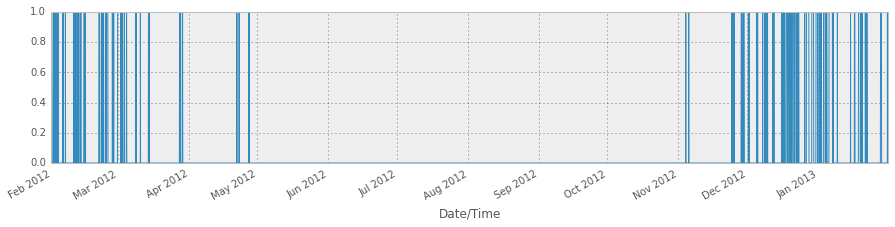

In [5]:
# More useful!
is_snowing.plot()

# 6.2 用重采样找到下雪最多的月份

如果想知道每个月的气温中值，可以使用 `resample()`

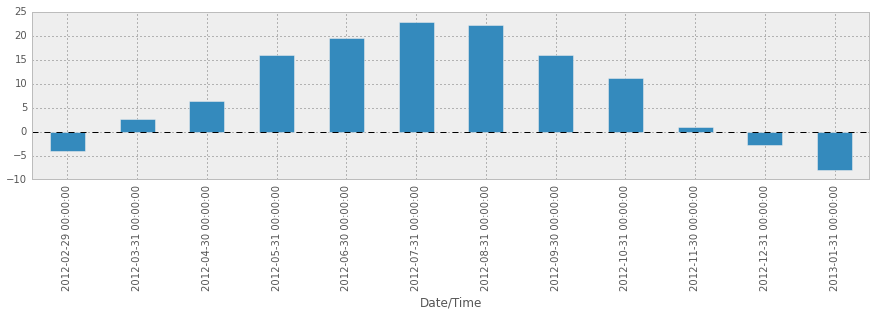

In [6]:
_ = weather_2012['Temp (C)'].resample('M', how=np.median).plot(kind='bar')

显然，七八月是最热的

接下来我们用0,1来表示是否下雪，而不是`True`或 `False`：

In [7]:
is_snowing.astype(float)[:10]

Date/Time
2013-01-01 00:00:00    1
2013-01-01 01:00:00    0
2013-01-01 02:00:00    1
2013-01-01 03:00:00    0
2013-01-01 04:00:00    0
2013-01-01 05:00:00    0
2013-01-01 06:00:00    0
2013-01-01 07:00:00    0
2013-01-01 08:00:00    0
2013-01-01 09:00:00    0
Name: Weather, dtype: float64

然后用 `resample`来找到每个月多少天下雪：

In [8]:
is_snowing.astype(float).resample('M', how=np.mean)

Date/Time
2012-02-29    0.162356
2012-03-31    0.087366
2012-04-30    0.015278
2012-05-31    0.000000
2012-06-30    0.000000
2012-07-31    0.000000
2012-08-31    0.000000
2012-09-30    0.000000
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
2013-01-31    0.197581
Freq: M, Name: Weather, dtype: float64

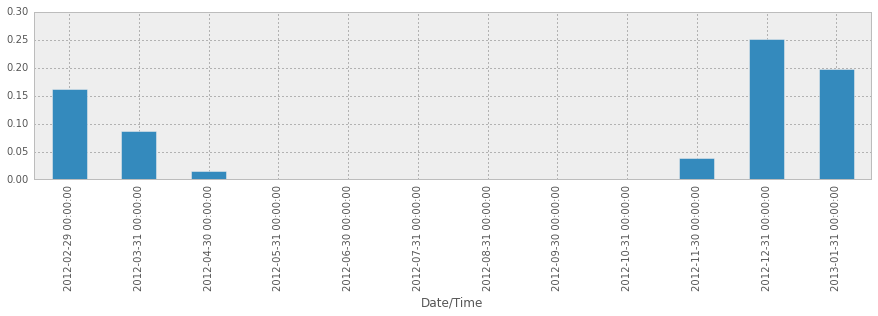

In [9]:
is_snowing.astype(float).resample('M', how=np.mean).plot(kind='bar')

现在我们知道了，2012年下雪最多的是12月，此外，这个图也印证了我的一些感受——十一月就开始下雪了，然后一直持续了好久才停，直到四五月份的最后一场雪。

# 6.3 把气温和下雪数据绘制在一起

我们可以把两种类型的数据融合到一个DataFrame然后画出来。

In [10]:
temperature = weather_2012['Temp (C)'].resample('M', how=np.median)
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('M', how=np.mean)

# Name the columns
temperature.name = "Temperature"
snowiness.name = "Snowiness"

接下来继续使用`.concat`来融合两个统计数据到一个DataFrame

In [11]:
stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperature,Snowiness
Date/Time,,
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000
2012-10-31,11.30,0.000000


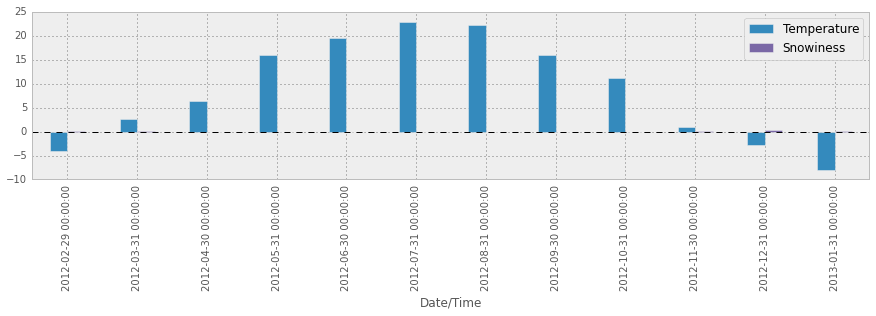

In [12]:
_ = stats.plot(kind='bar')

呃，有点不对劲，由于两个数据的大小范围不一样，导致另一维的数据根本看不到了，所以还是把两个数据拆分开来看

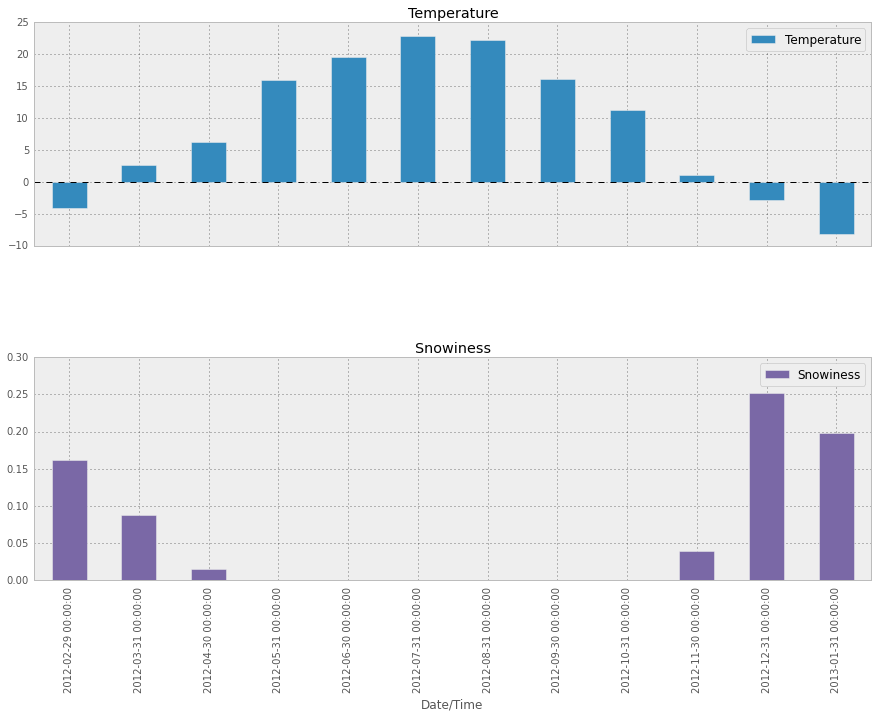

In [13]:
_ = stats.plot(kind='bar', subplots=True, figsize=(15, 10))

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  